In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)

mouse_drug_data_to_load = os.path.join("data", "mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data", "clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)                                           

# Combine the data into a single dataset
data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="left")

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [191]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol_mean = data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
                        
tumor_vol_mean_df = pd.DataFrame(tumor_vol_mean).reset_index()\
                        .rename(columns={"Tumor Volume (mm3)":"Tumor Vol (mm3) - Mean"})
tumor_vol_mean_df

,Drug,Timepoint,Tumor Vol (mm3) - Mean
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [192]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_error = data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
                           
tumor_vol_error_df = pd.DataFrame(tumor_vol_sem).reset_index()\
                            .rename(columns={"Tumor Volume (mm3)":"Tumor Vol (mm3) - Standar Error"})
tumor_vol_error_df

,Drug,Timepoint,Tumor Vol (mm3) - Standar Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [193]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_mean_pivot = tumor_vol_mean_df.pivot(index="Timepoint", columns="Drug", values="Tumor Vol (mm3) - Mean")
tumor_vol_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [203]:
tumor_vol_error_pivot = tumor_vol_error_df.pivot(index="Timepoint", columns="Drug", values="Tumor Vol (mm3) - Standar Error")

In [204]:
tumor_vol_error_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


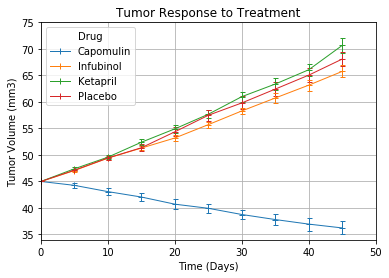

In [205]:
# Creating the df for 4 treatments to be analyzed
tumor_vol_study_mean_df = tumor_vol_mean_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
tumor_study_error_df = tumor_vol_error_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Generate the Plot (with Error Bars)
tumor_vol_study_mean_df.plot(
                             title="Tumor Response to Treatment",
                             kind="line", 
                             use_index=True,
                             yerr=tumor_study_error_df,
                             capsize=2.5,
                             grid=True, 
                             xlim=(0,50),
                             ylim=(34,75),
                             marker="+",
                             linewidth=1)
    
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("plots/Tumor_Response_Treatment.png")
plt.show()

## Metastatic Response to Treatment

In [206]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response_mean = pd.DataFrame(data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"])\
                                .reset_index()\
                                .rename(columns={"Metastatic Sites":"Metastatic Sites - Mean"})
metastatic_response_mean.head()

,Drug,Timepoint,Metastatic Sites - Mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [207]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_response_error = pd.DataFrame(data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"])\
                            .reset_index()\
                            .rename(columns={"Metastatic Sites":"Metastatic Sites - Error"})
metastatic_response_error.head()

,Drug,Timepoint,Metastatic Sites - Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [208]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean_pivot = metastatic_response_mean.pivot(index="Timepoint", columns="Drug")
metastatic_mean_pivot

Metastatic Sites - Mean                                          \
Drug                    Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                                   
0                        0.000000  0.000000  0.000000  0.000000  0.000000   
5                        0.160000  0.380952  0.280000  0.304348  0.260870   
10                       0.320000  0.600000  0.666667  0.590909  0.523810   
15                       0.375000  0.789474  0.904762  0.842105  0.857143   
20                       0.652174  1.111111  1.050000  1.210526  1.150000   
25                       0.818182  1.500000  1.277778  1.631579  1.500000   
30                       1.090909  1.937500  1.588235  2.055556  2.066667   
35                       1.181818  2.071429  1.666667  2.294118  2.266667   
40                       1.380952  2.357143  2.100000  2.733333  2.466667   
45                       1.476190  2.692308  2.111111  3.363636  2.538462   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.375000  0.320000  0.120000  0.240000  0.166667  
10         0.833333  0.565217  0.250000  0.478261  0.500000  
15         1.250000  0.764706  0.333333  0.782609  0.809524  
20         1.526316  1.000000  0.347826  0.952381  1.294118  
25         1.941176  1.357143  0.652174  1.157895  1.687500  
30         2.266667  1.615385  0.782609  1.388889  1.933333  
35         2.642857  2.300000  0.952381  1.562500  2.285714  
40         3.166667  2.777778  1.100000  1.583333  2.785714  
45         3.272727  2.571429  1.250000  1.727273  3.071429

In [209]:
metastatic_error_pivot = metastatic_response_error.pivot(index="Timepoint", columns="Drug")
metastatic_error_pivot

Metastatic Sites - Error                                          \
Drug                     Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                                    
0                         0.000000  0.000000  0.000000  0.000000  0.000000   
5                         0.074833  0.108588  0.091652  0.098100  0.093618   
10                        0.125433  0.152177  0.159364  0.142018  0.163577   
15                        0.132048  0.180625  0.194015  0.191381  0.158651   
20                        0.161621  0.241034  0.234801  0.236680  0.181731   
25                        0.181818  0.258831  0.265753  0.288275  0.185240   
30                        0.172944  0.249479  0.227823  0.347467  0.266667   
35                        0.169496  0.266526  0.224733  0.361418  0.330464   
40                        0.175610  0.289128  0.314466  0.315725  0.321702   
45                        0.202591  0.286101  0.309320  0.278722  0.351104   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.100947  0.095219  0.066332  0.087178  0.077709  
10         0.115261  0.105690  0.090289  0.123672  0.109109  
15         0.190221  0.136377  0.115261  0.153439  0.111677  
20         0.234064  0.171499  0.119430  0.200905  0.166378  
25         0.263888  0.199095  0.119430  0.219824  0.236621  
30         0.300264  0.266469  0.139968  0.230641  0.248168  
35         0.341412  0.366667  0.145997  0.240983  0.285714  
40         0.297294  0.433903  0.160591  0.312815  0.299791  
45         0.304240  0.428571  0.190221  0.359062  0.286400

In [213]:
# Creating the df for 4 treatments to be analyzed
metastatic_study_mean_df = metastatic_mean_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
metastatic_study_error_df = metastatic_error_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Generate the Plot (with Error Bars)
metastatic_study_mean_df.plot(
                             title="Metastatic Spread During Treatment",
                             kind="line", 
                             use_index=True,
                             yerr=metastatic_study_error_df,
                             capsize=2.5,
                             grid=True, 
                             xlim=(0,50),
                             ylim=(34,75),
                             marker="+",
                             linewidth=1)
    
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.savefig("plots/Metastatic Spread During Treatment.png")
plt.show()

KeyError: "['Capomulin' 'Infubinol' 'Ketapril' 'Placebo'] not in index"

## Survival Rats

In [212]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
rats_count = pd.DataFrame(data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"])\
                        .reset_index()\
                        .rename(columns={"Mouse ID":"Mouse Count"})

rats_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [184]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = rats_count.pivot(index="Timepoint", columns="Drug")
mouse_count_pivot.head()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [185]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
#plt.show()

## Summary Bar Graph

In [186]:
# Calculate the percent changes for each drug
percentage_change = ((tumor_vol_mean_pivot.iloc[-1])/(tumor_vol_mean_pivot.iloc[0])-1)*100

# Display the data to confirm
#percentage_change_drug


percentage_change_drug

Drug
Capomulin    0.823548
Ceftamin     1.457555
Infubinol    1.494445
Ketapril     1.605976
Naftisol     1.574216
Placebo      1.547366
Propriva     1.505876
Ramicane     0.794445
Stelasyn     1.555416
Zoniferol    1.499111
dtype: float64

In [187]:
# Splice the data between passing and failing drugs
passing = percentage_change < 0

# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percentage_change[durg])for drug in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig(os.path.join('figures','tumor_change_over_45day_treatment.png'))





# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'durg' is not defined